# INF8111 - Fouille de données / Data Mining
## Été 2024 - TP2 - Fouille de réseaux sociaux / Mining of social networks
### Membres de l'équipe / Team members
    - Ettahri Mahacine - 2312965 - 1
    - Li Xuewei - 1879356 - 2
    - Sanjari Kaywan - 1989922 - 3


## Instructions de remise / Submission

Vous devez remettre dans la boîte de remise sur moodle:

1. ce fichier nommé TP2\_NomDuMembre1\_NomDuMembre2\_NomDuMembre3.ipynb

**N.B**: Assurez-vous que tous les résultats soient lisibles lorsque le notebook est ouvert.

Ce notebook être remis avant le **02 juin 2024 à 23h55**. Tout travail en retard sera pénalisé d’une valeur de 10\% par jour ouvrable de retard.

## Barème

Partie 1: 10 points

Partie 2: 6 points

Partie 3: 4 points

Pour un total de 20 points.


---

## Submission

You must put back in the submission box on moodle:

1. this file renamed TP2\_NomDuMembre1\_NomDuMembre2\_NomDuMembre3.ipynb

**N.B**: Make sure that all results are there when you open your notebook.

Everything must be submitted before **June 2nd 2024 à 23h55**. Any late work will be penalized with a value of 10% per open day of delay.

## Barème
Part 1: 10 points

Part 2: 6 points

Part 3: 4 points

For a total of 20 points.


## Réseaux sociaux / Social Networks
Les réseaux sociaux occupent une grande partie de nos vies. Tout au long de sa,vie, chaque personne appartient à différentes communautés. Avec la récupération de ces informations par les différents réseaux sociaux, les data-analystes ont voulu exploiter ces données. C'est un domaine relativement nouveau qui est en pleine croissance avec de nombreux impacts, notamment sur la publicité et les systèmes de recommandation. 

### But
Le but de ce TP est de vous donner un aperçu de l'analyse de réseau social.

Dans la première partie, vous implémenterez un algorithme de détection de communautés dans un réseau social nommé LPAm+. Cet algorithme a été proposé par [X. Liu et T. Murata en 2010](https://www.sciencedirect.com/science/article/pii/S0378437109010152).

Dans la deuxième partie, vous trouverez les personnes avec le plus d'influence dans leur réseau social. 

Pour les deux parties, nous vous fournissons les CSV contenant les réseaux sociaux à analyser.

---

## Social networks
Social networks are a major component of the human life. Each person belongs throughout their life to different communities. With the aggregation of information on various online social media platforms, data analysts were interested in exploiting its data. It is a relatively new field that is growing with impacts on several aspects such as advertising and recommendation systems.


### Goal
The purpose of this lab is to give you an overview of social network analysis.

In the first part, you will implement an algorithm for detecting communities in a social network called LPAm+. This algorithm was proposed by [X. Liu and T. Murata in 2010](https://www.sciencedirect.com/science/article/pii/S0378437109010152).

In the second part, you will find the people with the most influence in their social network.

For both parts, we provide you with the CSV containing the social networks to be analysed.

# 1. LPAm+ (10 points)

## Détection de communauté
La détection de communauté dans un réseau social est une manipulation fréquente lors de l'analyse d'un réseau. Une méthode de clustering est utilisée pour regrouper les personnes dans des communautés selon leurs liens. 

## LPAm+
Dans cette partie, vous devez implémenter l'algorithme LPAm+ pour détecter les communautés parmi les personnages de l'univers cinématographique Marvel (MCU, en anglais). Vous devez utiliser les CSVs *nodes* et *edges* pour cela. 

Cet algorithme consiste à propager les étiquettes dans le réseau selon une règle d'évaluation optimisant la modularité du réseau. Lorsque l'algorithme atteint un optimum local, il regarde s'il peut fusionner deux communautés pour augmenter la modularité du réseau. L'algorithme choisit toujours la combinaison la plus avantageuse. Si une combinaison est trouvée, la propagation des étiquettes est refaite. L'algorithme continue tant qu'il peut améliorer la modularité. Vous pouvez lire l'article mentionné plus haut pour plus de détails, mais cela n'est pas nécessaire puisque vous allez être guidé tout le long du TP. 

Pour faciliter la représentation du réseau, nous vous proposons d'utiliser la librairie networkx. La documentation est disponible [ici](https://networkx.github.io/documentation/stable/tutorial.html).



---

## Community detection
Community detection in a social network is a frequent manipulation when analysing a network. A clustering method is used to bring people together in communities according to the links between them.


## LPAm+
In this part, you will implement the LPAm+ algorithm to detect the communities among the characters of the Marvel Cinematic Universe (MCU). You must use the nodes and edges csv for this.

This algorithm consists in propagating the labels in the network according to an evaluation rule optimizing the modularity of the network. When the algorithm reaches a local optimum, it checks whether it can combine two communities to increase the modularity of the network. The algorithm always chooses the most advantageous combination. If a combination is found, the propagation of the labels is redone. The algorithm continues until it is no longer able to increase modularity. You can read the article mentioned above for more details, but you do not need to, as you will be guided throughout the TP.


To help you represent a network, we suggest that you use the networkx package.You can read more about the package [here](https://networkx.github.io/documentation/stable/tutorial.html).

In [75]:
# vous pouvez bien sûr utiliser anaconda pour installer les packages

!pip install --user numpy
!pip install --user pandas
!pip install --user matplotlib
!pip install --user networkx

In [71]:
# vérifier si les libraries sont bien installés

import networkx
print('networkx: {}'.format(networkx.__version__))

import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

networkx: 3.1
matplotlib: 3.7.2


In [72]:
from itertools import combinations
import numpy as np
import networkx as nx
import itertools
import math
import tqdm


class LPAmPlus:
   
    """
    Constructor
    """
    def __init__(self, graph):
        """
        graph gives the graph on which the algorithm will be applied;
        """
        self.graph = graph
        
        """
        labels gives all the communities present in the network
        """
        self.labels = list(graph.nodes())

        """
        Assign a label to each node
        """
        [self.graph.nodes[node].update({'label': node}) for node in self.graph.nodes()]

        """
        Modularity matrix
        """
        self.mod_matrix = nx.linalg.modularity_matrix(self.graph)


    """
    Term to optimize when replacing labels
    """

    def label_evaluation(self, current_node, new_label):
        
        # Get labels of all nodes
        labels = np.array(list(nx.get_node_attributes(self.graph, 'label').values()))
    
        # Find nodes with the same label as new_label
        same_label_nodes = np.where(labels == new_label)[0]
    
        # Exclude the current node from the calculation
        same_label_nodes = np.delete(same_label_nodes, np.where(same_label_nodes == current_node))
    
        # Compute label_evaluation using vectorized operations
        label_evaluation = np.sum(self.mod_matrix[:, current_node][same_label_nodes])
    
        return label_evaluation


    """
    Function to choose the new label for a node
    """

    def update_label(self, current_node):
        
        # Get the current label
        current_label = self.graph.nodes[current_node]['label']
    
        # Get unique labels present in the graph
        unique_labels = np.unique(np.array(list(nx.get_node_attributes(self.graph, 'label').values())))
        
        # Remove the current label from unique_labels
        unique_labels = unique_labels[unique_labels != current_label]

        # Evaluate all labels stored in "unique_labels" except the current label
        evaluation_values = np.array([self.label_evaluation(current_node, new_label) for new_label in unique_labels])

        # Find the best label
        best_label_indices = np.where(evaluation_values == np.max(evaluation_values))[0]
        best_label_index = np.random.choice(best_label_indices)
        best_label = unique_labels[best_label_index]
    
        # Update the label if it's different from the current label
        if best_label != current_label:
            self.graph.nodes[current_node]['label'] = best_label
    
        # Update self.labels to contain only unique labels present in the graph
        self.labels = np.unique(np.array(list(nx.get_node_attributes(self.graph, 'label').values()))).tolist()

    
    """
    Function that calculates the current modularity of the network
    """

    def modularity(self):

        # m : number of edges
        m = self.graph.number_of_edges()

        # Create a matrix of labels
        labels = np.array(list(nx.get_node_attributes(self.graph, 'label').values()))
    
        # Compute delta matrix
        delta = np.equal.outer(labels, labels).astype(int)
    
        # Compute modularity
        Q = np.sum(self.mod_matrix * delta) / (2 * m)

        return Q
    
    
    """
    Function that applies the LPAm algorithm on the network
    """

    def LPAm(self):

        is_modularity_improved = True
    
        # Precompute modularity once outside the loop
        current_modularity = self.modularity()

        # Continue as long as the modularity keeps getting improved
        while is_modularity_improved:
            
            is_modularity_improved = False

            for node in sorted(self.graph.nodes()):

                # Update the current's node label
                current_label = self.graph.nodes[node]['label']
                self.update_label(node)
                new_label = self.graph.nodes[node]['label']

                # Test if the label is changed
                if new_label != current_label:
                    
                    new_modularity = self.modularity()

                    # Keep the change is the modularity is improved
                    if new_modularity > current_modularity:
                        is_modularity_improved = True
                        current_modularity = new_modularity

                    # Revert the change if it does not improve modularity
                    else:
                        self.graph.nodes[node]['label'] = current_label
            
                # Update self.labels
                self.labels = np.unique(np.array(list(nx.get_node_attributes(self.graph, 'label').values()))).tolist()  
                 

   
    """
    Function that find which communities to combine and combine them
    """
    def merge_communities(self):
        
        # Initialize variables to keep track of the best communities to merge and the corresponding modularity improvement
        best_merge = None
        best_modularity_improvement = 0

        # n : number of nodes
        n = self.graph.number_of_nodes()

        # current modularity
        current_modularity = self.modularity()

        
        # Iterate over all pairs of communities
        for community1, community2 in combinations(sorted(self.labels), 2):

            # Initialize an array to store original labels
            community2_nodes = [i for i in range(n) if self.graph.nodes[i]['label'] == community2]
            
            # Merge communities
            nx.set_node_attributes(self.graph, {i: community1 for i in community2_nodes}, 'label')
                 
            # Calculate the modularity improvement from merging the communities
            modularity_improvement = self.modularity() - current_modularity
            
            # Update the best merge if the improvement is greater than the current best
            if modularity_improvement > best_modularity_improvement:
                best_merge = (community1, community2)
                best_modularity_improvement = modularity_improvement

            # At the end, put back the original labels
            nx.set_node_attributes(self.graph, {i: community2 for i in community2_nodes}, 'label')
                
        # If a merge improves modularity, perform the merge
        if best_merge is not None:
            
            community1, community2 = best_merge
            
            for i in range(0,n):
                if self.graph.nodes[i]['label'] == community2:
                    self.graph.nodes[i]['label'] = community1
            
            
            # Update self.labels to remove the merged community
            self.labels.remove(community2)
            
            return True
        
        else:
            return False
    
    
    """
    Function that applies the LPAm+ algorithm on the network
    """

    def find_communities(self):

        
        self.LPAm()

        # Apply LPam as long as merging two communities keeps improving the modularity
        while self.merge_communities():
            self.LPAm()

### 1.1 Dataset (1 point)

Nous vous avons fourni le fichier *`tp-marvel-dataset-subset.csv`* contenant l'ensemble des personnages de l'univers cinématographique Marvel. Vous devez maintenant créer un graphe reliant tous les personnages. Vous devez suivre les règles ci-dessous :

#### Mise en œuvre
1. Implémentez la fonction *`load_unweighted_network`*. Cette fonction retourne un graphe non orienté et non pondéré.
2. Chaque personnage est un nœud unique du graphe. Aucun personnage ne peut donc apparaître deux fois dans le graphe.
3. Tous les personnages d'un même film doivent être connectés.

Utilisez la fonction `test_load` pour vérifier votre implémentation de la fonction. Ce test utilise un sous-ensemble de l'ensemble de données. Vous devriez obtenir un résultat semblable à celui-ci :

![titre](picture.png)

---
We have provided you with the a .CSV file, called *`tp-marvel-dataset-subset.csv`*, with all the characters from movies in the Marvel Cinematic Universe. You must now create a graph connecting all the characters. You should follow the rules below:

#### Implementation
1. Implement the function *`load_unweighted_network`*. This function returns a undirected and unweighted graph.
2. Each character must be a single node inside the graph. No character should appear twice in the graph. 
3. All characters in a same movie should be connected.

Use the function `test_load` to verify your implementation of the function. This test uses a subset of the whole dataset. You should obtain a result similar to this:

![title](picture.png)


In [73]:
import csv
import pandas as pd
import networkx as nx
from itertools import combinations

def load_unweighted_network(source_csv):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(source_csv, sep=';', encoding='utf-8')
    
    # Create an undirected graph
    network = nx.Graph()

    # Get heros by their ids (the nodes)
    nodes = df['Hero_id'].unique()

    # Intialize the edges
    edges = []
    
    # Iterate through each unique movie
    for movie in df['Movie'].unique():
        
        # Get the characters that appear in the current movie
        characters_in_movie = df[df['Movie'] == movie]['Hero_id'].unique()
        
        # Add edges for each pair of characters in the movie
        edges.extend(combinations(characters_in_movie, 2))

    network.add_nodes_from(nodes)
    network.add_edges_from(edges)

    return network

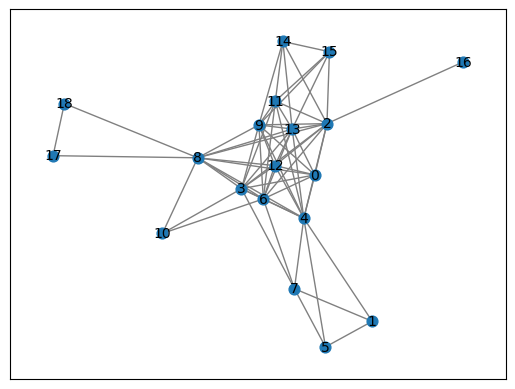

<Figure size 2000x2000 with 0 Axes>

In [74]:
import matplotlib.pyplot as plt

def test_load():
    network = load_unweighted_network("data/tp-marvel-dataset-subset.csv")
    nx.draw_networkx(network, node_size=60, font_size=10, edge_color = 'gray', font_color='black')
    plt.figure(figsize=(20,20))
    plt.show()

test_load()

### 1.2  Modularité / Modularity (1 point)

La modularité $Q$ du réseau est une mesure importante pour l'algorithme: elle permet de savoir si l'algorithme a atteint un optimum local. $$ Q=\frac{1}{2m}\sum_{u,v=1}^n B_{uv}\delta(l_u,l_v)$$ 

- m: nombre d'arêtes
- l: étiquette d'un sommet
- u, v: sommets du réseau
- B: matrice de modularité (chaque élément vaut $A_{uv} - P_{uv}$)
- $A_{uv}$: vaut 1 si il y une arête entre u et v sinon 0
- $P_{uv}$: la probabilité qu'il y ait une arête entre u et v selon le modèle nul  $$P_{uv}=\frac{degree(u)*degree(v)}{2m}$$
- $\delta(l_u,l_v)$: symbole de Kronecker, vaut 1 si les deux labels sont identiques sinon 0

#### Implémentation
1. Implémentez  la fonction  `modularity`  dans LPAmPlus. Cette fonction retourne la modularité du réseau. Vous pouvez utiliser la fonction `nx.linalg.modularity_matrix` de networkx pour calculer la matrice B. **N.B:** Networkx permet d'ajouter du data sur les sommets pour garder des informations sur le node. Les `nodes` agissent comme des dictionnaires.

Utilisez la fonction `test_modularity` pour vérifier votre implémentation de la fonction. Vous devriez obtenir une modularité d'environ 0.019.

---

The modularity $Q$ of the network is an important measure for the algorithm. The algorithm uses it to determine if it reached a local optimum or not. $$ Q=\frac{1}{2m}\sum_{u,v=1}^n B_{uv}\delta(l_u,l_v)$$ 

- m: number of edges
- l: node's label
- u, v: nodes in the graph
- B: modularity matrix where each element is $A_{uv} - P_{uv}$
- $A_{uv}$: is 1 if there is an edge between u and v else 0
- $P_{uv}$: probability that there is an edge between u and v following the null model $$P_{uv}=\frac{degree(u)*degree(v)}{2m}$$
- $\delta(l_u,l_v)$: Kronecker's delta, is 1 if labels are the same else 0

#### Implementation
1. Implement the function `modularity` in the class LPAmPlus. This function returns the modularity of the network. You can use the function `nx.linalg.modularity_matrix` from networkx to calculate B. **N.B:** You can add data to nodes with Networkx to store information about the node. You can add data to nodes with Networkx to store information about the node. The nodes act like a dictionnary.

Use the function `test_modularity` to test your implementation. You should have a modularity of 0.019.

In [75]:
def test_modularity():
    social_network = load_unweighted_network("data/tp-marvel-dataset-subset.csv")
    lpam = LPAmPlus(social_network)
    lpam.labels = [0, 1]
    for i in range(0, 19):
        lpam.graph.nodes[i]['label'] = 0 if i < 10 else 1
    print("Modularity: {:.3f}".format(lpam.modularity()))

test_modularity()

Modularity: 0.010


### 1.3 Règle de modification des étiquettes / Updating rule for the labels (2 points)

Comme mentionné plus haut, l'algorithme est basé sur une optimisation de la modularité. Il vous est demandé d'implémenter le terme à optimiser. La nouvelle étiquette $l_x^{new}$ correspond à l'étiquette pour laquelle la somme a la plus grande valeur.
$$l_x^{new}=\arg\max_l\sum_{u=1}^n B_{ux}\delta(l_u,l)$$

- n: le nombre de sommets
- m: le nombre d'arêtes
- l: une étiquette possible pour le sommet x
- x: le sommet qu'on évalue en ce moment
- u: un autre sommet dans le réseau (commence à 1, car on exclut le sommet x)
- B: la matrice de modularité où chaque élément vaut $A_{ux} - P_{ux}$
- $A_{ux}$: vaut 1 si il y une arête entre u et x sinon 0
- $P_{ux}$: la probabilité qu'il y ait une arête entre u et x selon le modèle nul  $$P_{ux}=\frac{degree(u)*degree(x)}{2m}$$
- $\delta(l_u,l)$: delta de Kronecker, vaut 1 si les deux labels sont identiques sinon 0


#### Implémentation
1. Implémenter la fonction `label_evaluation`. Cette fonction retourne la valeur du terme à optimiser. Vous pouvez utiliser la fonction `linalg.modularity_matrix` de networkx pour calculer la matrice B. Il est normal qu'il y ait une ressemblance avec le calcul de la modularité selon la définition que vous avez prise. `new_label` correspond donc à un $l$ possible dans le terme.
2. Implémenter la fonction `update_label`. Cette fonction met à jour la nouvelle étiquette pour un sommet. En cas d'égalité, la fonction choisit une étiquette au hasard parmi les meilleurs. N'oubliez pas d'enlever les étiquettes désuètes du paramètre `labels`. **N.B:** Il est possible que la meilleure étiquette soit celle actuelle du sommet.

Networkx permet d'ajouter du data sur les sommets. Les sommets sont des dictionnaires dans le graphe.

---

As mentioned above, the algorithm is strongly based on its optimization of modularity. You are now asked to implement the term to optimize. The new label $l_x^{new}$ corresponds to the label for which the sum gives the greatest value.
$$l_x^{new}=\arg\max_l\sum_{u=1}^n B_{ux}\delta(l_u,l)$$

- n: number of nodes
- m: number of edges
- l: a possible label for the node x
- x: current node being evaluated
- u: another node in the network (starts at 1, because we exclude the node x)
- B: modularity matrix where each element is $A_{ux} - P_{ux}$
- $A_{ux}$: is 1 if there is an edge between u and x else 0
- $P_{ux}$: the probability that there is an edge between u and x  following the null model  $$P_{ux}=\frac{degree(u)*degree(x)}{2m}$$
- $\delta(l_u,l)$: Kronecker's delta, is 1 if labels are the same else 0


#### Implementation
1. Implement the function `label_evaluation`. This function returns the value for the term to optimize. You can use the function `linalg.modularity_matrix` from networkx to calculate B. It is normal if there is a similarity with the modularity depending on the definition you took. `new_label` represent a possible $l$ in the term.
2. Implement the function `update_label`. This function chooses the new label for the current node. If there is more than one label with the max value, the function chooses randomly one amoung those. Don't forget to remove the unused labels from the `labels` attribute. **N.B:** The best label can be the node's current label. 

You can add data to nodes with Networkx to store information about the node. The nodes act like a dictionnary.



In [76]:
def test_label_evaluation():
    social_network = load_unweighted_network("data/tp-marvel-dataset-subset.csv")
    lpam = LPAmPlus(social_network)
    print(lpam.graph.nodes[0]['label'])
    print(lpam.label_evaluation(1,lpam.graph.nodes[1]['label']))
    print(lpam.labels)
    lpam.update_label(0)
    print(lpam.graph.nodes[0]['label'])
    print(lpam.labels)

test_label_evaluation()

0
0.0
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
12
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


### 1.4 LPAm (2 points)

Vous pouvez maintenant implémenter l'algorithme LPAm. Cet algorithme est le prédécesseur de LPAm+ puisque LPAm+ a été crée pour contourner une faiblesse de LPAm.  LPAm est un algorithme de propapagation d'étiquettes basé sur la modularité. Il commence par donner une étiquette unique à chaque sommet. Il explore par la suite tous les sommets et modifie leur étiquette selon la fonction d'évaluation que vous avez implémentée plus tôt. L'algorithme continue la propagation d'étiquette à travers tous les sommets jusqu'à un optimum de la modularité.

#### Implémentation
1. Ajouter les étiquettes initiales aux sommets du graphe avec la fonction `__init__`. Il faut que chaque sommet soit dans sa propre communauté au début de l'algorithme. Initialiser le paramètre `labels` pour qu'il contient la liste des étiquettes présentes dans le réseau.

2. Implémenter l'algorithme LPAm dans la fonction `LPAm`. Assurez-vous de toujours augmenter la modularité lors de vos changements d'étiquettes. N'oubliez pas de garder le paramètre `labels` à jour à fur et à mesure lors de vos changements pour ne pas évaluer plusieurs fois la même étiquette.

Utilisez la fonction `test_lpam` pour vérifier votre implémentation. Vous devriez finir avec une modularité d'environ 0.184 avec 5 communautés.

---

You can now implement the LPAm algorithm. This algorithm is the predecessor of LPAm+ since LPAm+ was created to overcome LPAm's weakness. LPAm is a label probagation algorithm based on modularity. It begins by giving a unique label to each node. It then explores all the nodes and changes their label according to the evaluation function that you implemented earlier. The algorithm continues until it can no longer improve the modularity of the network.

#### Implementation
1. Add the initial labels to the nodes in the graph in the function `__init__`. Each nodes has to be in their own community in the beginning. Initialise `labels` with the current list of labels present in the graph.

2. Implement the LPAm algorithm in the function`LPAm`. Make sure that all your labels changes improve the modularity. Don't forget to keep your `labels` parameter is kept up-to-date so that you dont evaluate the same label multiple times or unused labels.

Use the function `test_lpam` to verify your implementation. You should have a modularity of 0.184 with 5 communities.

In [77]:
def test_lpam():
    social_network = load_unweighted_network("data/tp-marvel-dataset-subset.csv")
    lpam = LPAmPlus(social_network)
    lpam.LPAm()
    print("Modularity: {:.3f}\nCommunities: {}".format(lpam.modularity(), lpam.labels))

test_lpam()

Modularity: 0.184
Communities: [5, 10, 12, 14, 18]


### 1.5 LPAm+ (2 points)

Vous pouvez maintenant implémenter LPAm+ au complet. LPAm+ est une amélioration de LPAm. Lorsque LPAm tombe dans un optimum local, LPAm+ essaye de combiner deux communautés pour augmenter la modularité et ainsi sortir du optimum local. LPAm+ choisit la combinaison qui augmente le plus la modularité et recommence la propagation d'étiquette jusqu'au prochain optimum local où il va réessayer de combiner des communautés. L'algorithme continue jusqu'à qu'il ne puisse plus augmenter la modularité.

#### Implémentation
1. Implémentez  la fonction  `merge_communities`. Cette fonction évalue si combiner des communautés augmente la modularité et combine le meilleur choix. Elle retourne True si une combinaison a été faite sinon False (aucune combinaison augmente la modularité).
2. Implémenter `find_communities`. Cette fonction applique l'algorithme LPAm+ sur le réseau en utilisant les fonctions `LPAm` et `merge_communities`.

Utilisez la fonction `test_lpam_plus` pour vérifier votre implémentation. Vous devriez finir avec une modularité d'environ 0.204 et 3 communautés.

---

You can now fully implement LPAm+. As said before LPAm+ is an amelioration of LPAm. The issue with LPAm is that it stops when it finds a local optimun. To prevent that, LPAm+ tries to combine two communities to increase modularity and escape the local optimun. LPAm+ chooses the combination that most increases modularity and restart the label's propagation until the next local optimum where it will try to combine two communities again. The algorithm continues until it can no longer increase modularity.

#### Implementation
1. Implement the function  `merge_communities`. This function check if combining communities improve the modularity and combine the best choice. It returns True if a combinaison was made else False (no combination increase the modularity).
2. Implement the LPAM+ algorithm in the function `find_communities` using the fonctions `LPam` and `merge_communities`.

Use the function `test_lpam_plus` to verify your implementation. You should end with a modularity of 0.204 and 3 communities.

In [78]:
def test_lpam_plus():
    social_network = load_unweighted_network("data/tp-marvel-dataset-subset.csv")
    lpam = LPAmPlus(social_network)
    lpam.find_communities()
    print("Modularity: {:.3f}\nCommunities: {}".format(lpam.modularity(), lpam.labels))

test_lpam_plus()

Modularity: 0.204
Communities: [5, 10, 14]


### 1.6 MCU dataset (2 points)

Exécutez votre algorithme sur l'ensemble de données de caractères MCU complet (*`tp-marvel-dataset.csv`*) et comparez ce que vous obtenez avec les communautés réelles. Ces communautés réelles se trouvent dans la colonne Affiliation du csv.

Commencez par calculer le RI (Rand index) de vos résultats. $$ RI=\frac{TP+TN}{TP+TN+FP+FN} = \frac{TP+TN}{\binom{n}{2}}$$

- n : nombre de nœuds
- TP : Vrai positif le nombre de paires d'éléments qui sont dans la même communauté dans vos résultats et dans la vérité terrain
- TN : Vrai négatif le nombre de paires d'éléments qui se trouvent dans des communautés différentes dans vos résultats et dans la vérité terrain
- FP : Faux positif le nombre de paires d'éléments qui sont dans la même communauté dans vos résultats mais qui sont dans des communautés différentes dans la vérité terrain
- FN : Faux négatif le nombre de paires d'éléments qui sont dans des communautés différentes dans vos résultats mais qui sont dans la même communauté dans la vérité terrain

**N.B :** Ce qui compte ici, c'est la composition des communautés que vous avez trouvées, pas les noms. Un TP, c'est quand le nœud a et le nœud b sont tous les deux dans les mêmes communautés dans votre résultat et dans la vérité terrain.

Répondre aux questions suivantes. Ce sont des guides pour votre analyse.

- L'algorithme fonctionne-t-il bien ?
- Le manque de nombreuses communautés affecte-t-il les performances algorithmiques ?
- Comment le fait de connecter tous les personnages d'un film affecte-t-il les résultats ?
- Expliquez pourquoi vous avez obtenu ces résultats en analysant les communautés dans l'ensemble de données. Quelles particularités offrent de meilleurs résultats ou entravent l'algorithme ?

Vous pouvez faire les manipulations que vous souhaitez pour mieux présenter vos résultats et mieux étayer vos propos.

---

Run your algorithm over whole MCU characters dataset (*`tp-marvel-dataset.csv`*) and compare what you get and the real communities. The ground truth is found in the Affiliation column in the csv. 

Start by calculating the RI (Rand index) of your results. $$ RI=\frac{TP+TN}{TP+TN+FP+FN} = \frac{TP+TN}{\binom{n}{2}}$$

- n: number of nodes
- TP: True positive the number of pairs of elements that are in the same community in your results and in the ground truth
- TN: True negative the number of pairs of elements that are in different communities in your results and in the ground truth
- FP: False positive the number of pairs of elements which are in the same community in your results but which are in different communities in the ground truth
- FN: False negative the number of pairs of elements which are in different communities in your results but which are in the same community in the ground truth

**N.B:** What matters here is the composition of the communities you found not the names. A TP is when the node a and the node b are both in the same communities in your result and in the ground truth.

Answer the following questions. They are guides for your analysis.

- Does the algorithm perform well?
- Does the lack of many communities affect the algorithmic performance?
- How does the fact of connecting all characters in a movie affect the results?
- Explain why you obtained those results by analysing the communities in the dataset. Which particularities offer better results, or hinder the algorithm?

You can do the manipulations you want to better present your results and better support your statements.

#### Résultats / Results

In [79]:
social_network = load_unweighted_network("data/tp-marvel-dataset.csv")
lpam = LPAmPlus(social_network)

In [80]:
lpam.find_communities()

In [81]:
print("Modularity: {:.3f}".format(lpam.modularity()))

Modularity: 0.437


In [82]:
# Initialize an empty dictionary to store nodes grouped by label
grouped_nodes = {}

# Iterate over nodes and group them by label (after LPAM++ execution)
for node in lpam.graph.nodes():
    label = lpam.graph.nodes[node]['label']
    if label in grouped_nodes:
        grouped_nodes[label].append(node)
    else:
        grouped_nodes[label] = [node]

In [83]:
for key, value in grouped_nodes.items():
    print(key, value)
    print() 

2 [0, 2, 13, 26, 35, 47, 54, 56, 72, 74, 75, 80, 85, 90, 92, 95, 112, 120, 139, 141, 149, 157, 161, 181, 182, 188, 200, 203, 212, 213, 214, 216, 217, 225, 230, 235, 240, 259, 262, 264, 270, 273, 280, 281, 293, 305, 306, 319, 321, 324, 329]

103 [1, 7, 15, 18, 25, 27, 32, 39, 43, 50, 52, 70, 87, 88, 103, 105, 115, 126, 129, 134, 140, 142, 144, 155, 158, 164, 176, 194, 196, 199, 201, 206, 210, 215, 237, 246, 247, 258, 261, 263, 272, 288, 310, 327, 333, 335, 336, 340, 341, 342]

147 [3, 4, 6, 9, 11, 14, 17, 28, 37, 38, 40, 41, 42, 45, 46, 51, 57, 58, 60, 61, 62, 66, 68, 81, 86, 93, 97, 98, 102, 104, 107, 118, 119, 122, 124, 131, 132, 137, 143, 145, 147, 148, 150, 151, 152, 153, 154, 160, 171, 173, 175, 178, 180, 186, 189, 195, 208, 209, 211, 223, 226, 238, 241, 242, 243, 249, 267, 279, 287, 303, 316, 318, 320, 328, 330, 331, 339]

106 [5, 16, 33, 63, 79, 106, 136, 163, 166, 170, 191, 236, 239, 269, 282, 285, 301]

82 [8, 21, 24, 36, 49, 59, 77, 82, 99, 100, 101, 111, 114, 116, 133, 167, 1

In [84]:
# Initialize an empty dictionary to store affiliations and their associated hero IDs
ground_truth = {}

# Read the dataset
df = pd.read_csv("data/tp-marvel-dataset.csv", sep=';')

# Get the nodes grouped by affiliation column
grouped = df.groupby('Affiliation')

for affiliation, group_data in grouped:
    ground_truth[affiliation] = set(group_data['Hero_id'].tolist())

In [85]:
for key, value in ground_truth.items():
    print(key, value)
    print()

A.I.M. {201, 310, 7}

Avengers {32, 322, 291, 134, 326, 327, 41, 43, 139, 14, 238, 302, 121, 93}

Children of Thanos {224, 99, 81, 241, 58, 61}

Dora Milaje {233, 22, 334}

Guardians of the Galaxy {193, 257, 77, 114, 343, 284}

Guardians of the Multiverse {42, 291, 292, 165}

Howling Commandos {97, 303, 145, 147, 152}

Revengers {168, 317, 183}

Starforce {167, 39, 206, 18, 342}

Unnafiliated {0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15, 16, 17, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 40, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 59, 60, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 95, 96, 98, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 131, 132, 133, 135, 136, 137, 138, 140, 141, 142, 143, 144, 146, 148, 149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 

In [86]:
from itertools import combinations
from scipy.special import comb

n = lpam.graph.number_of_nodes()

TP = 0
TN = 0
FP = 0
FN = 0

# Iterate over all pairs of nodes
for node1, node2 in combinations(lpam.graph.nodes, 2):
    # Check if nodes belong to the same community in both results and ground truth
    if any(node1 in group and node2 in group for group in grouped_nodes.values()):
        if any(node1 in affiliation and node2 in affiliation for affiliation in ground_truth.values()):
            TP += 1
        else:
            FP += 1
    else:
        if not any(node1 in affiliation and node2 in affiliation for affiliation in ground_truth.values()):
            TN += 1
        else:
            FN += 1

# Calculate Rand Index
RI = (TP + TN) / (TP + TN + FP + FN)

print("Rand Index (RI):", RI)
print("True Positive (TP):", TP)
print("True Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)
print("Total:", TP + TN + FP + FN)

Rand Index (RI): 0.33336684259026556
True Positive (TP): 6081
True Negative (TN): 13816
False Positive (FP): 2345
False Negative (FN): 37443
Total: 59685


In [87]:
print("Rand Index: {:.3f}".format(RI))

Rand Index: 0.333


#### Analyse / Analysis


# 2. Social network analysis (6 points)

Une autre analyse intéressante à faire avec un réseau social est de trouver les personnes influentes du réseau, c'est-à-dire les personnes autour desquelles les personnes du réseau se regroupent.

Il y a des mesures qui permettent de connaître ces personnes : les mesures de centralité. **Vous devez implémenter ces métriques vous-mêmes. N'utilisez pas l'implémentation `networkx` pour le tp.** Utilisez le dataset Marvel complet. 

---

Another interesting analysis to do with a social network is to find the influential people in the network, ie the people around whom the people in the network gather.

There are measures which make it possible to know these people: the centrality measures. **You must implement those metrics yourselves. Do not use `networkx` implementation for the  tp.** Use the whole Marvel dataset. 



## 2.1 Centralité de degré / Degree centrality (2 points)

Une première mesure simple pour trouver l'importance d'un sommet dans un réseau est la centralité de degré. Elle se calcule selon la formule suivante $$C_{D}(i) = \frac{degree(i)}{n-1}$$

- i: un sommet dans le réseau
- n: le nombre de sommets
- degree: le nombre d'arêtes attachées au sommet

#### Implémentation
1. Implémenter la fonction `calculate_degree_centrality`. Cette fonction calcule la centralité de degré pour tous les sommets du réseau et ajoute cette mesure à chaque sommet.

2. Affichez les 10 centralités les plus élevées pour l'ensemble de données MCU. À titre indicatif, la centralité la plus élevée devrait être de 0.48.

---

A first simple measure to find the importance of a node in a network is the degree centrality. It is calculated $$C_{D}(i) = \frac{degree(i)}{n-1}$$

- i: a node in the network
- n: the number of nodes
- degree: the number of edges attached to the node

#### Implementation
1. Implement the function `calculate_degree_centrality`. This function calculates degree centrality for all nodes in the network and adds this measurement to each node.
2. Show the highest 10 centralities for the MCU dataset. As a hint, the highest centrality should be 0.48.

In [88]:
def calculate_degree_centrality(social_network):

    # n : number of nodes
    n = social_network.number_of_nodes()

    for i in range(0,n):
        social_network.nodes[i]['degree_centrality'] = social_network.degree(i) / (n -1)

In [89]:
social_network = load_unweighted_network("data/tp-marvel-dataset.csv")
calculate_degree_centrality(social_network)
# Show the highest 10 centralities
sorted_centralities = sorted(social_network.nodes(data=True), key=lambda x: x[1]['degree_centrality'], reverse=True)[:10]
for node, data in sorted_centralities:
    print(f"Node: {node}, Degree Centrality: {data['degree_centrality']}")

Node: 41, Degree Centrality: 0.48405797101449277
Node: 139, Degree Centrality: 0.4260869565217391
Node: 32, Degree Centrality: 0.41739130434782606
Node: 226, Degree Centrality: 0.4115942028985507
Node: 332, Degree Centrality: 0.3739130434782609
Node: 134, Degree Centrality: 0.3710144927536232
Node: 120, Degree Centrality: 0.3681159420289855
Node: 286, Degree Centrality: 0.35942028985507246
Node: 321, Degree Centrality: 0.35942028985507246
Node: 77, Degree Centrality: 0.3536231884057971


## 2.2 Centralité de proximité / Closeness centrality (2 points)

Une autre mesure simple pour trouver l'importance d'un sommet dans un réseau est la centralité de proximité. Elle se calcule avec la formule suivante $$C_{P}(i) = \frac{1}{AvDist(i)}$$

- i: un sommet dans le réseau
- AvDist: la moyenne de toutes les distances les plus courtes pour atteindre chaque sommet à partir du sommet i

#### Implémentation
1. Implémenter la fonction `calculate_closeness_centrality`. Cette fonction calcule la centralité de proximité pour tous les sommets du réseau et ajoute cette mesure à chaque sommet. Considérer chaque arête comme une distance de 1.

**NB**: Utiliser la fonction `shortest_path()` du module Networkx pour trouver le chemin le plus court entre des sommets

2. L'ensemble de données a deux composants connectés. Utilisez la fonction `nx.connected_components` pour obtenir chacun d'eux. Calculez la centralité de proximité pour chaque composante et expliquez vos résultats.

3. Affichez les 10 centralités les plus élevées pour le plus grand composant connexe. À titre indicatif, la centralité la plus élevée devrait être de 0.67.

---

Another simple measure for finding the importance of a node in a network is closeness centrality. It is calculated $$C_{P}(i) = \frac{1}{AvDist(i)}$$

- i: a node in the network
- AvDist: the average of all shortest distances to reach each vertex from vertex i

#### Implementation
1. Implement the function `calculate_closeness_centrality`. This function calculates closeness centrality for all nodes in the network and adds this measurement to each node. Consider each edge as a distance of 1.

**NB**: Use the fucntion `shortest_path()` from Networkx to find the shortest path between two nodes.

2. The dataset has two connected components. Use the function `nx.connected_components` to get each one of them. Calculate the closeness centrality for each component, and explain your results. 

3. Show the highest 10 centralities for the largest connected component. As a hint, the highest centrality should be 0.67.

In [90]:
import statistics

def calculate_closeness_centrality(social_network):

    for node in social_network.nodes():
        
        # Calculate shortest paths from the current node to all other nodes
        shortest_paths = nx.shortest_path(social_network, source=node)
        
        # Filter out paths where the target is the same as the source
        valid_paths = {target: path for target, path in shortest_paths.items() if target != node}
        
        # Calculate the sum of shortest distances
        total_distance = statistics.mean(len(path) - 1 for path in valid_paths.values())
        
        # Calculate closeness centrality for the current node
        social_network.nodes[node]['closeness_centrality'] = 1 / total_distance if total_distance != 0 else 0
    

In [91]:
import networkx as nx

# Get connected components
connected_components = list(nx.connected_components(social_network))

# Calculate closeness centrality for each component
closeness_centralities = []
for component in connected_components:
    subgraph = social_network.subgraph(component)
    calculate_closeness_centrality(subgraph)
    closeness_centralities.append(subgraph)

# Find the largest connected component
largest_component = max(closeness_centralities, key=len)

# Show the highest 10 centralities for the largest connected component
sorted_centralities = sorted(largest_component.nodes(data=True), key=lambda x: x[1]['closeness_centrality'], reverse=True)[:10]
for node, data in sorted_centralities:
    print(f"Node: {node}, Closeness Centrality: {data['closeness_centrality']}")

Node: 41, Closeness Centrality: 0.6707566462167689
Node: 139, Closeness Centrality: 0.6444007858546169
Node: 32, Closeness Centrality: 0.640625
Node: 226, Closeness Centrality: 0.6381322957198443
Node: 332, Closeness Centrality: 0.6223908918406073
Node: 134, Closeness Centrality: 0.6212121212121212
Node: 120, Closeness Centrality: 0.6200378071833649
Node: 286, Closeness Centrality: 0.6165413533834586
Node: 321, Closeness Centrality: 0.6165413533834586
Node: 77, Closeness Centrality: 0.6142322097378278


## 2.3 Centralité d'intermédiarité / Betweeness centrality (2 points)

Une dernière mesure simple pour trouver l'importance d'un sommet dans un réseau est la centralité d'intermédiarité. Elle se calcule avec cette formule $$C_{I}(i) = \frac{\sum_{j<k}f_{jk}(i)}{\binom{n-1}{2}}$$

- n: le nombre de sommets dans le réseau
- i: un sommet dans le réseau
- j,k: deux sommets dans le réseau excluant i
- $f_{jk}(i)$: la proportion des chemin le plus court partant du sommet j vers un sommet k (> j) passant par le sommet i 

#### Implémentation
1. Implémenter la fonction `calculate_betweenness_centrality`. Cette fonction calcule la centralité d'intermédiarité pour tous les sommets du réseau et ajoute cette mesure à chaque sommet.

**NB**: Utilisez les fonctions `all_shortest_paths()` ou `shortest_path()` de Networkx pour calculer des chemins simples les plus courts du graphe.

2. L'ensemble de données a deux composants connectés. Utilisez la fonction `nx.connected_components` pour obtenir chacun d'eux. Calculez la centralité de proximité pour chaque composante et expliquez vos résultats.

3. Affichez les 10 centralités les plus élevées pour l'ensemble de données MCU. À titre indicatif, la centralité la plus élevée devrait être de 0.073.

---

A final simple measure to find the importance of a node in a network is the betweeness centrality. It is calculated $$C_{I}(i) = \frac{\sum_{j<k}f_{jk}(i)}{\binom{n-1}{2}}$$

- n: the number of nodes in the network
- i: a node in the network
- j,k: two nodes in the network excluding i
- $f_{jk}(i)$: the proportion of shortest paths from vertex j to vertex k (> j) passing through node i

#### Implementation
1. Implement the function `calculate_betweenness_centrality`.This function calculates the betweenness centrality for all the nodes of the network and adds this measurement to each node.

**NB**: Use the functions `all_shortest_paths()` or `shortest_path()` from Networkx to compute the shortest simple paths in the graph.

2. The dataset has two connected components. Use the function `nx.connected_components` to get each one of them. Calculate the closeness centrality for each component, and explain your results. 

3. Show the highest 10 centralities for the MCU dataset. As a hint, the highest centrality should be 0.073.

In [92]:
from math import factorial
from collections import defaultdict
from itertools import combinations
import tqdm

def calculate_betweenness_centrality(social_network):
    
    # n: number of nodes
    n = social_network.number_of_nodes()

    # Initialize dictionaries to store counts of shortest paths
    shortest_path_counts = defaultdict(int)
    shortest_path_with_i_counts = defaultdict(int)

    # Iterate over all combinations of nodes
    for source, target in tqdm.tqdm(combinations(social_network.nodes(), 2), desc="Calculating shortest paths"):
        if source < target :
            
            # Calculate all shortest paths between source and target
            paths = nx.all_shortest_paths(social_network, source=source, target=target)
            
            # Store the number of shortest paths
            for path in paths:
                shortest_path_counts[(source, target)] += 1
                for i in path[1:-1]:  # Exclude start and end nodes
                    shortest_path_with_i_counts[(source, target, i)] += 1

    # Calculate betweenness centrality for each node
    for i in tqdm.tqdm(social_network.nodes(), desc="Calculating betweenness centrality"):
        social_network.nodes[i]['betweenness_centrality'] = 0.0
        for (source, target), count_jk in shortest_path_counts.items():
            if i != source and i != target:
                social_network.nodes[i]['betweenness_centrality'] += shortest_path_with_i_counts[(source, target, i)] / shortest_path_counts[(source, target)]
    
        # Calculate betweenness centrality for node i
        social_network.nodes[i]['betweenness_centrality'] /= (math.factorial(n - 1) / (math.factorial(2) * math.factorial(n - 3)))

In [93]:
import networkx as nx

# Get connected components
connected_components = list(nx.connected_components(social_network))

# Calculate closeness centrality for each component
betweenness_centralities = []
for component in connected_components:
    subgraph = social_network.subgraph(component)
    calculate_betweenness_centrality(subgraph)
    betweenness_centralities.append(subgraph)

# Find the largest connected component
largest_component = max(betweenness_centralities, key=len)

# Show the highest 10 centralities for the MCU Dataset
sorted_centralities = sorted(largest_component.nodes(data=True), key=lambda x: x[1]['betweenness_centrality'], reverse=True)[:10]
for node, data in sorted_centralities:
    print(f"Node: {node}, Betweenness Centrality: {data['betweenness_centrality']}")

Calculating shortest paths: 53956it [06:07, 146.88it/s]
Calculating betweenness centrality: 100%|████████████████████████████████████████████| 329/329 [00:22<00:00, 14.60it/s]
Calculating shortest paths: 136it [00:00, 9515.34it/s]
Calculating betweenness centrality: 100%|███████████████████████████████████████████| 17/17 [00:00<00:00, 16376.47it/s]

Node: 41, Betweenness Centrality: 0.07378780938778164
Node: 32, Betweenness Centrality: 0.05903614581775922
Node: 332, Betweenness Centrality: 0.04950448547252951
Node: 139, Betweenness Centrality: 0.04005442890737821
Node: 134, Betweenness Centrality: 0.0384278734481065
Node: 286, Betweenness Centrality: 0.03759161502339876
Node: 226, Betweenness Centrality: 0.036886817945287455
Node: 42, Betweenness Centrality: 0.03355909317676027
Node: 183, Betweenness Centrality: 0.031885635447447734
Node: 43, Betweenness Centrality: 0.03149906978032276


# 3. Méchants MCU/MCU Villains (4 points)

L'univers cinématographique Marvel est connu pour avoir des méchants très notables. Nous vous demandons de construire un modèle pour suivre ces méchants. Vos fonctionnalités doivent être chaque film dans lequel les personnages ont été et les mesures de centralité calculées auparavant.

---

The Marvel Cinematic Universe is known to have very notable villains. We ask you to build a model to track those villains. Your features should be each movie that the characters have been in, and the centrality measures calculated before. 

## 3.1. Création du ensemble de données/Creating the dataset (2 points)

À partir de la liste des films fournis, créez des features à partir de la colonne `Movie` afin d'entraîner votre jeu de données, et fusionner ces valeurs avec les centralités, pour chaque personnage. Utilisez la méthode de votre choix dans ce processus.

Les centralités étant très variables, mieux vaut normaliser chaque mesure. Sélectionnez une méthode de votre choix pour ramener toutes les mesures à une seule échelle.

Utilisez le fichier .CSV *`tp-marvel-villains.csv`* comme principale source d'indication si un personnage est un méchant. Fusionnez ce fichier dans l'ensemble de données global en tant qu'étiquette Mechant (la feature `y`).

---

From the list of movies given, create features from the column `Movie` so as to train your dataset, and merge these values ​​with the centralities, for each character.. Use any method of your choice in this process.

As the centralities vary greatly, it is better to normalize each measure. Select a method of your choice to bring all of the measures to a single scale.  

Use the .CSV file *`tp-marvel-villains.csv`* as the main source of indication whether a character is a villain. Merge this file into the overall dataset as the Villain label (the `y` feature).

In [94]:
import pandas as pd

# Load dataframes from the files
heroes_df = pd.read_csv('data/tp-marvel-dataset.csv', sep=';', encoding = 'utf-8')
villains_df = pd.read_csv('data/tp-marvel-villains.csv', sep=',', encoding = 'utf-8')

# Create a dictionary to map movie names to binary columns
movies = heroes_df['Movie'].unique()
movie_columns = {movie: 0 for movie in movies}

# Add a column for each movie and initialize to 0
for movie in movie_columns.keys():
    heroes_df[movie] = 0

# Update binary column values based on movies where the hero appears
for index, row in heroes_df.iterrows():
    movie = row['Movie']
    heroes_df.at[index, movie] = 1

# Add a column to indicate if a hero is a villain
heroes_df['Villain'] = heroes_df['Hero_name'].isin(villains_df['Villain'].str.replace('“', '"').str.replace('”', '"')).astype(int)

# Group by Hero_id and Hero_name and aggregate to keep only one line for each hero
heroes_df = heroes_df.groupby(['Hero_id', 'Hero_name']).agg({
    **{movie: 'max' for movie in movies},  # Take the maximum value for each movie
    'Villain': 'max'  # Take the maximum value for the 'Villain' column
}).reset_index()

Text(0.5, 0.98, 'Distribution of Centrality Measures (Asymmetric Data)')

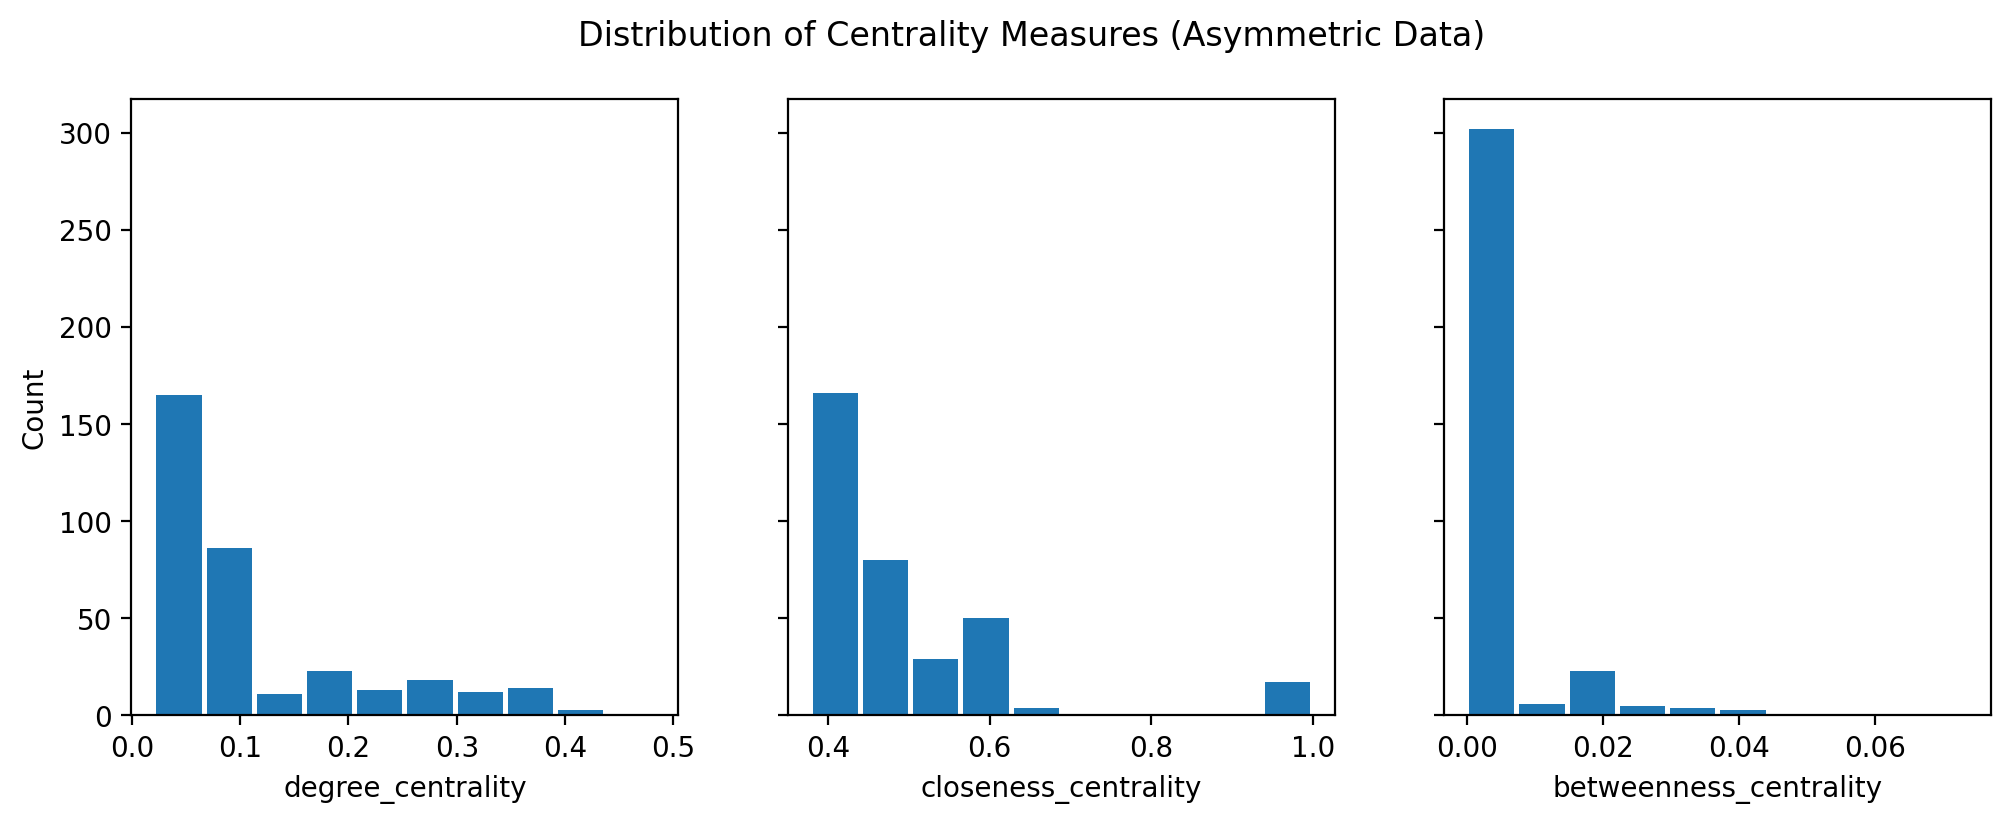

In [95]:
import matplotlib.pyplot as plt

# Get centrality measures
degree_centrality = [social_network.nodes[hero_id]['degree_centrality'] for hero_id in social_network.nodes]
closeness_centrality = [social_network.nodes[hero_id]['closeness_centrality'] for hero_id in social_network.nodes]
betweenness_centrality = [social_network.nodes[hero_id]['betweenness_centrality'] for hero_id in social_network.nodes]

# Plot the data distribution for each measure
fig, ax = plt.subplots(1,3,dpi=200,sharey=True)
fig.set_size_inches(12,4)

ax[0].hist(degree_centrality,rwidth=0.9)
ax[0].set_xlabel('degree_centrality')
ax[0].set_ylabel('Count')

ax[1].hist(closeness_centrality,rwidth=0.9)
ax[1].set_xlabel('closeness_centrality')


ax[2].hist(betweenness_centrality,rwidth=0.9)
ax[2].set_xlabel('betweenness_centrality')

# Add a total title to the figure
fig.suptitle('Distribution of Centrality Measures (Asymmetric Data)')

In [96]:
from scipy.stats import zscore

# Add new columns for centrality measures to the DataFrame (After normalizing)
heroes_df['Degree_Centrality'] = zscore(degree_centrality)
heroes_df['Closeness_Centrality'] = zscore(closeness_centrality)
heroes_df['Betweenness_Centrality'] = zscore(betweenness_centrality)

In [97]:
# Reorder the columns placing 'Villain' at the end
columns_ordered = list(heroes_df.columns)
columns_ordered.remove('Villain')
columns_ordered.append('Villain')
heroes_df = heroes_df[columns_ordered]

In [98]:
villain_count = heroes_df['Villain'].sum()
print("Number of villains in the dataset:", villain_count)

Number of villains in the dataset: 38


In [99]:
print(heroes_df.columns)

Index(['Hero_id', 'Hero_name', 'Spider-Man: Homecoming', 'The Incredible Hulk',
       'Shang-Chi and the Legend of the Ten Rings',
       'Captain America: The First Avenger',
       'Captain America: The Winter Soldier', 'Eternals', 'Avengers: Endgame',
       'Iron Man 3', 'Guardians of the Galaxy Vol. 2',
       'Doctor Strange in the Multiverse of Madness', 'Doctor Strange',
       'Black Panther: Wakanda Forever', 'Ant-Man',
       'Captain America: Civil War', 'Ant-Man and the Wasp',
       'Ant-Man and the Wasp: Quantumania', 'Iron Man 2', 'Captain Marvel',
       'Thor: Love and Thunder', 'Black Panther', 'Avengers: Infinity War',
       'Guardians of the Galaxy', 'Marvel’s The Avengers',
       'Spider-Man: Far From Home', 'Spider-Man: No Way Home',
       'Avengers: Age of Ultron', 'Thor: Ragnarok', 'Black Widow',
       'Thor: The Dark World', 'Iron Man', 'Thor', 'Degree_Centrality',
       'Closeness_Centrality', 'Betweenness_Centrality', 'Villain'],
      dtype='object')


In [100]:
heroes_df

,Hero_id,Hero_name,Spider-Man: Homecoming,The Incredible Hulk,Shang-Chi and the Legend of the Ten Rings,Captain America: The First Avenger,Captain America: The Winter Soldier,Eternals,Avengers: Endgame,Iron Man 3,...,Avengers: Age of Ultron,Thor: Ragnarok,Black Widow,Thor: The Dark World,Iron Man,Thor,Degree_Centrality,Closeness_Centrality,Betweenness_Centrality,Villain
0,0,Aaron Davis,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.170693,-0.378087,-0.381897,0
1,1,Abomination,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,-0.499801,-0.351639,-0.284221,1
2,2,Abraham,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.170693,-0.378087,-0.381897,0
3,3,Abraham Erskine,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,-0.709233,-0.429723,-0.381897,0
4,4,Agent 13,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,-0.589558,-0.292833,-0.381897,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,341,Ying Nan,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,-0.679314,-0.492009,-0.381897,0
342,342,Yon-Rogg,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.649395,-0.241402,-0.381897,1
343,343,Yondu Udonta,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.080937,-0.628326,-0.342600,0
344,344,Zeus,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.230531,-0.555830,-0.381897,0


## 3.2. Construire le modèle/Building the model (2 points)


Maintenant, utilisez votre créativité pour construire un modèle pour prédire les méchants dans l'ensemble de données, à partir des fonctionnalités que vous avez créées. Voici quelques points pour vous guider :

1. Des démonstrations graphiques seront appréciées. Ne vous contentez pas de prédire vos données, affichez vos valeurs de manière agréable.
2. Expliquez vos résultats. L'ajout des fonctionnalités de centralité aide-t-il votre modèle d'une manière ou d'une autre? Les films aident-ils votre modèle? Si vous ne deviez garder qu'un seul des deux sous-ensembles, lequel garderiez-vous?

---

Now, use your creativity to build a model to predict the villains in the dataset, from the features that you have created. Here are some points to guide you:

1. Graphical demonstrations will be appreciated. Do not just predict your data, show your values in a pleasant way. 
2. Explain your results. Does the addition of the centrality features help your model somehow? Do the movies help your model? If you had to keep just one of the two subsets, which one would you keep?

### Modèle (Forêt aléatoire) avec toutes les fonctionnalités et l'ensemble de données d'origine

In [101]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Get Features and target variable
X = heroes_df.drop(['Hero_id', 'Hero_name', 'Villain'], axis=1)
y = heroes_df['Villain']

# Split Data into training (80%) test sets (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Prepare a list of hyperparameters to evaluate
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3]
}

# Train the model and evaluate it with cross validation to obtain the best values of the hyperparameters
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best estimator (best combination of hyperparameters)
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate model performance on the test set
y_pred = best_rf.predict(X_test)

# Predict probabilities for the positive class (villain class)
y_probs = best_rf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred, zero_division=1))

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        61
           1       1.00      0.00      0.00         9

    accuracy                           0.87        70
   macro avg       0.94      0.50      0.47        70
weighted avg       0.89      0.87      0.81        70



<Figure size 800x600 with 0 Axes>

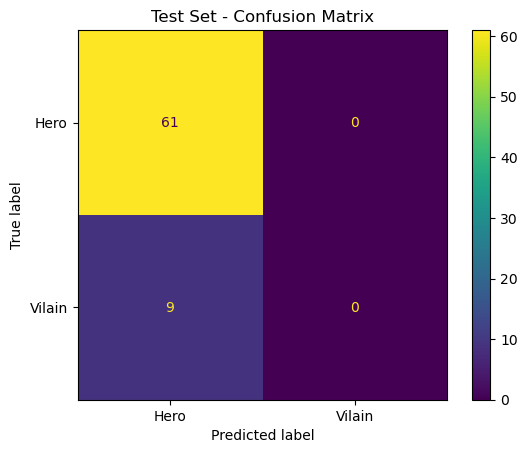

In [102]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Hero','Vilain'])
disp.plot()
plt.title('Test Set - Confusion Matrix')
plt.show()

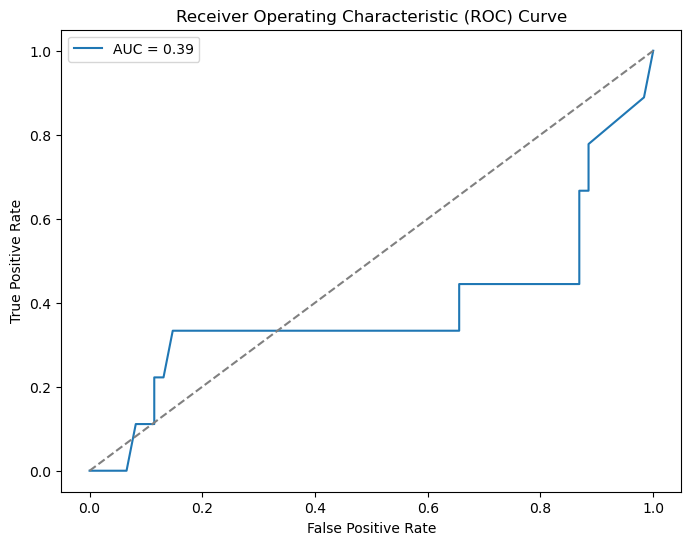

In [103]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### Distribution des classes (Données déséquilibrées)

In [104]:
!pip install imbalanced-learn

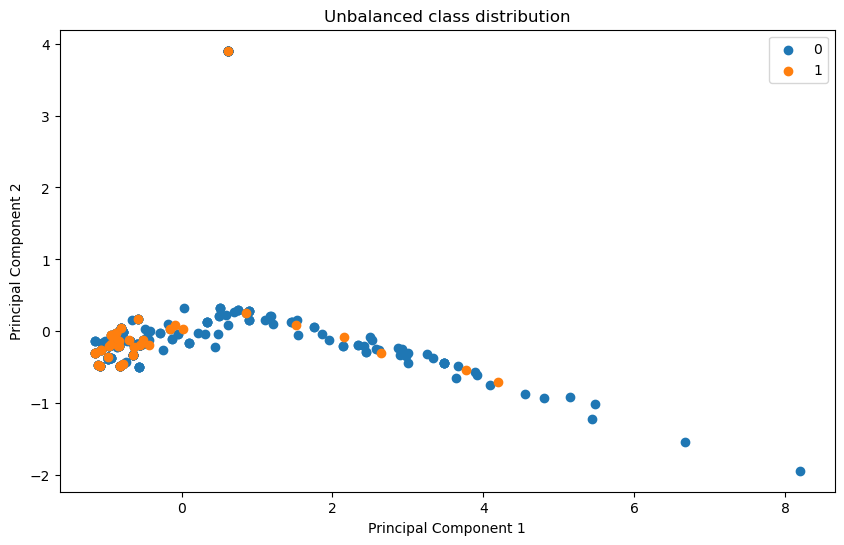

In [105]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from numpy import where
from sklearn.decomposition import PCA

# Get Features and target variable
X = heroes_df.drop(['Hero_id', 'Hero_name', 'Villain'], axis=1)
y = heroes_df['Villain']

# Summarize class distribution
counter = Counter(y)

# Dimensionality reduction with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a scatter plot to show classes distribution
plt.figure(figsize=(10, 6))
for label, _ in counter.items():
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=str(label))

plt.title('Unbalanced class distribution')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [106]:
print(pca.explained_variance_ratio_)

[0.47169031 0.17763905]


### Équilibrage des classes avec SMOTE (technique de suréchantillonnage synthétique des minorités)

## IMPORTANT 
#### Il se peut que l'éxécution de la prochaine cellule cause l'erreur "'Pipeline' Object has no attribute '_check_fit_params'". Une solution à ce problème serait de déinstaller les libraries imblearn et scikit-learn et les réinstaller avec la version : !pip install --user scikit-learn==1.2.2 et !pip install imbalanced-learn==0.12.3. Si ceci n'est pas suffisante, redémarrer le système et ceci devrait régler le problème.

Counter({0: 308, 1: 154})


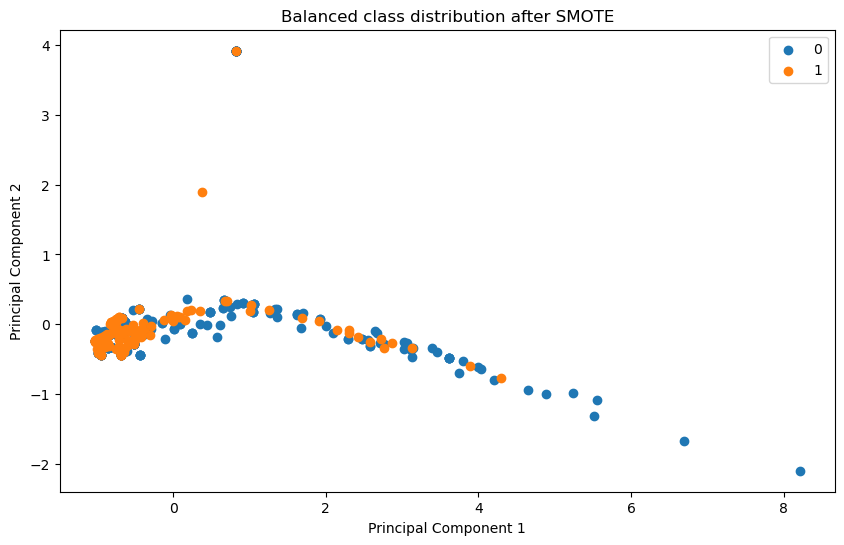

In [107]:
# Define pipeline
over = SMOTE(sampling_strategy=0.5, random_state=42)
under = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# Transform the dataset
X_resampled, y_resampled = pipeline.fit_resample(X, y)

# Summarize the new class distribution
counter = Counter(y_resampled)
print(counter)

# Dimensionality reduction with PCA
pca = PCA(n_components=2)
X_pca_resampled = pca.fit_transform(X_resampled)

# Create a scatter plot to show classes distribution
plt.figure(figsize=(10, 6))
for label, _ in counter.items():
    plt.scatter(X_pca_resampled[y_resampled == label, 0], X_pca_resampled[y_resampled == label, 1], label=str(label))

plt.title('Balanced class distribution after SMOTE')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [108]:
print(pca.explained_variance_ratio_)

[0.493201   0.16620682]


### Modèle (Forêt aléatoire) avec toutes les fonctionnalités et l'ensemble de données équilibré 

In [109]:
# Split Data into training (80%) and test sets (20%)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state=42)

# Prepare a list of hyperparameters to evaluate
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate model performance
y_pred = best_rf.predict(X_test)

# Predict probabilities for the positive class
y_probs_forest = best_rf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred, zero_division=1))

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
              precision    recall  f1-score   support

           0       0.88      0.95      0.92        63
           1       0.88      0.73      0.80        30

    accuracy                           0.88        93
   macro avg       0.88      0.84      0.86        93
weighted avg       0.88      0.88      0.88        93



<Figure size 800x600 with 0 Axes>

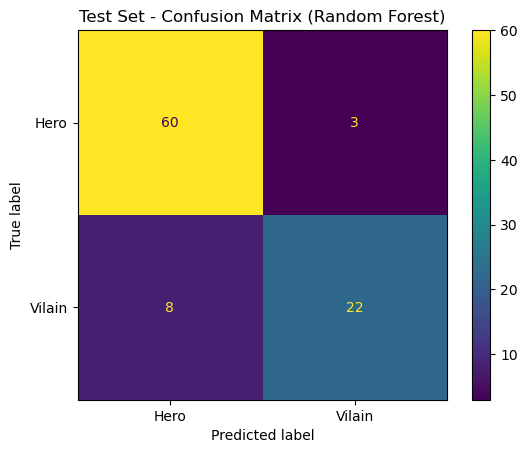

In [110]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Hero','Vilain'])
disp.plot()
plt.title('Test Set - Confusion Matrix (Random Forest)')
plt.show()

### Modèle (Régression logistique) avec toutes les fonctionnalités et l'ensemble de données équilibré 

In [111]:
from sklearn.linear_model import LogisticRegression 

# Train a logistic regression model
lr = LogisticRegression() 
lr.fit(X_train, y_train.ravel())

y_probs_logistic = lr.predict(X_test)

print(classification_report(y_test, y_probs_logistic)) 

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        63
           1       0.87      0.67      0.75        30

    accuracy                           0.86        93
   macro avg       0.86      0.81      0.83        93
weighted avg       0.86      0.86      0.85        93



<Figure size 800x600 with 0 Axes>

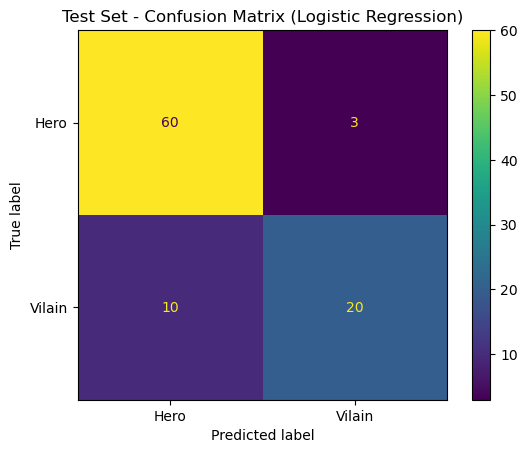

In [112]:
# Plot confusion matrix for logistic regression
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_probs_logistic, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Hero','Vilain'])
disp.plot()
plt.title('Test Set - Confusion Matrix (Logistic Regression)')
plt.show()

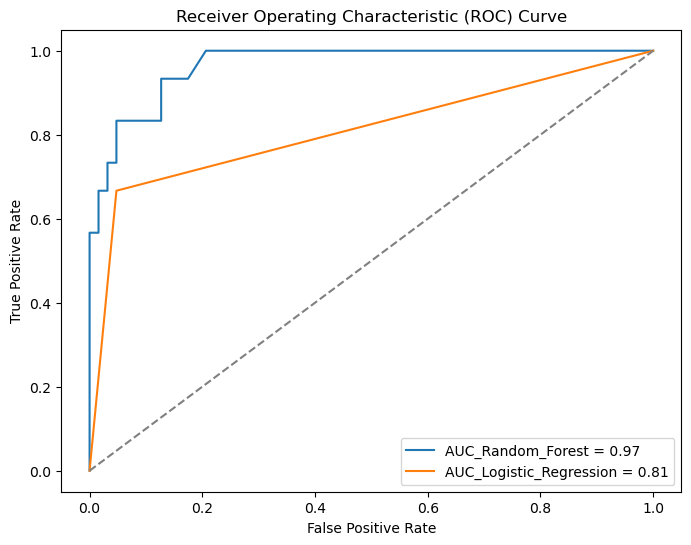

AUC Score Random Forest: 0.9661375661375661
AUC Score Logistic Regression: 0.8095238095238093


In [113]:
# Calculate fpr, tpr, thresholds
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_test, y_probs_forest)
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_test, y_probs_logistic)

# Calculate AUC score
auc_score_forest = roc_auc_score(y_test, y_probs_forest)
auc_score_logistic = roc_auc_score(y_test, y_probs_logistic)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_forest, tpr_forest, label=f'AUC_Random_Forest = {auc_score_forest:.2f}')
plt.plot(fpr_logistic, tpr_logistic, label=f'AUC_Logistic_Regression = {auc_score_logistic:.2f}')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
print("AUC Score Random Forest:", auc_score_forest)
print("AUC Score Logistic Regression:", auc_score_logistic)

### Modèle (Forêt aléatoire) avec les fonctionnalités de Centralité uniquement et l'ensemble de données équilibré

In [114]:
# Get Features and target variable
X = heroes_df.iloc[:, -4:-1]
y = heroes_df.iloc[:, -1]

# Transform the dataset
X_resampled, y_resampled = pipeline.fit_resample(X, y)

# Split Data into training (80%) and test sets (20%)
X_train_centralities, X_test_centralities, y_train_centralities, y_test_centralities = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Prepare a list of hyperparameters to evaluate
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_centralities, y_train_centralities)

best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate model performance
y_pred_centralities = best_rf.predict(X_test_centralities)

# Predict probabilities for the positive class
y_probs_centralities = best_rf.predict_proba(X_test_centralities)[:, 1]

print(classification_report(y_test_centralities, y_pred_centralities, zero_division=1))

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.80      0.95      0.87        63
           1       0.83      0.50      0.62        30

    accuracy                           0.81        93
   macro avg       0.82      0.73      0.75        93
weighted avg       0.81      0.81      0.79        93



<Figure size 800x600 with 0 Axes>

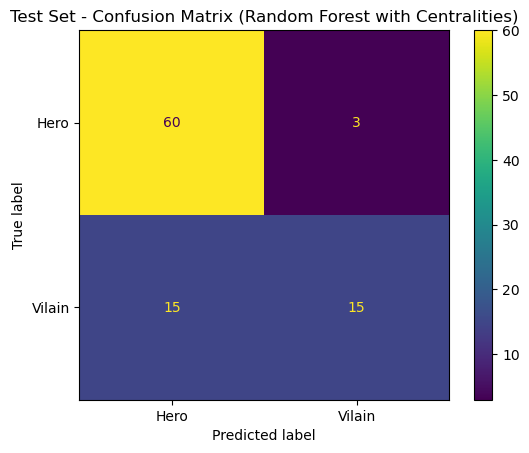

In [115]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_centralities, y_pred_centralities, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Hero','Vilain'])
disp.plot()
plt.title('Test Set - Confusion Matrix (Random Forest with Centralities)')
plt.show()

### Modèle (Forêt aléatoire) avec les fonctionnalités 'Movies' uniquement et l'ensemble de données équilibré

In [116]:
# Get Features and target variable
X = heroes_df.iloc[:, 2:33]
y = heroes_df.iloc[:, -1]

X_resampled, y_resampled = pipeline.fit_resample(X, y)

# Split Data into training (80%) and test sets (20%)
X_train_movies, X_test_movies, y_train_movies, y_test_movies = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Prepare a list of hyperparameters to evaluate
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_movies, y_train_movies)

best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate model performance
y_pred_movies = best_rf.predict(X_test_movies)

# Predict probabilities for the positive class
y_probs_movies = best_rf.predict_proba(X_test_movies)[:, 1]

print(classification_report(y_test_movies, y_pred_movies, zero_division=1))

Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        63
           1       1.00      0.67      0.80        30

    accuracy                           0.89        93
   macro avg       0.93      0.83      0.86        93
weighted avg       0.91      0.89      0.89        93



<Figure size 800x600 with 0 Axes>

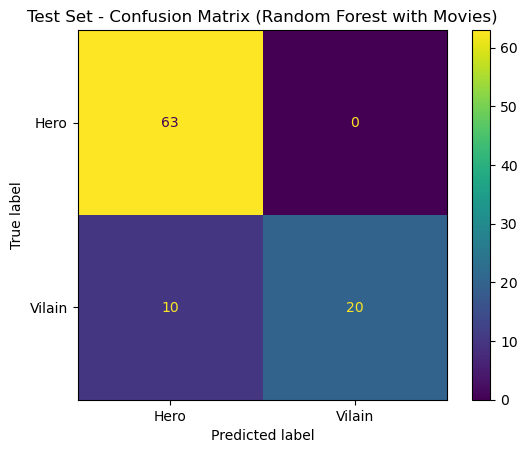

In [117]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_movies, y_pred_movies, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Hero','Vilain'])
disp.plot()
plt.title('Test Set - Confusion Matrix (Random Forest with Movies)')
plt.show()

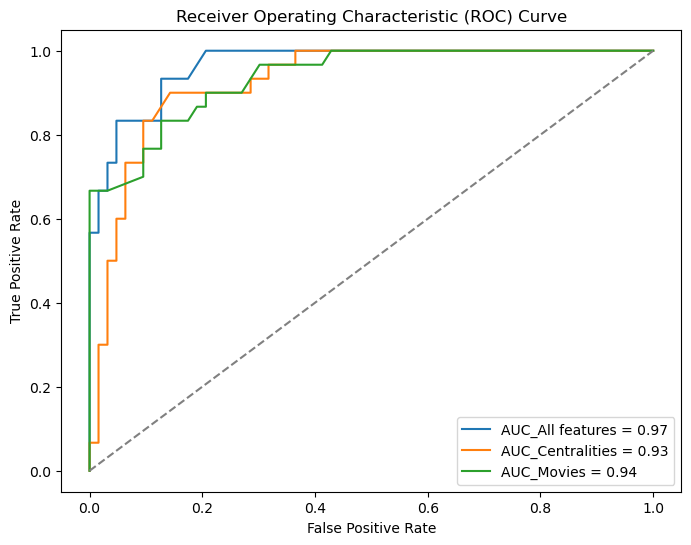

AUC Score All features: 0.9661375661375661
AUC Score Centralities: 0.9264550264550264
AUC Score Movies: 0.937037037037037


In [118]:
# Calculate fpr, tpr, thresholds
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_test, y_probs_forest)
fpr_centralities, tpr_centralities, thresholds_centralities = roc_curve(y_test_centralities, y_probs_centralities)
fpr_movies, tpr_movies, thresholds_movies = roc_curve(y_test_movies, y_probs_movies)

# Calculate AUC score
auc_score_forest = roc_auc_score(y_test, y_probs_forest)
auc_score_centralities = roc_auc_score(y_test_centralities, y_probs_centralities)
auc_score_movies = roc_auc_score(y_test_movies, y_probs_movies)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_forest, tpr_forest, label=f'AUC_All features = {auc_score_forest:.2f}')
plt.plot(fpr_centralities, tpr_centralities, label=f'AUC_Centralities = {auc_score_centralities:.2f}')
plt.plot(fpr_movies, tpr_movies, label=f'AUC_Movies = {auc_score_movies:.2f}')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

print("AUC Score All features:", auc_score_forest)
print("AUC Score Centralities:", auc_score_centralities)
print("AUC Score Movies:", auc_score_movies)

### Feature Engineering (Piste 1)

In [119]:
# Get Dataset columns
movie_names = [column for column in heroes_df.columns]

# Remove non-movie columns such as 'Hero_id', 'Hero_name', 'Degree_Centrality', etc.
movie_names.remove('Hero_id')
movie_names.remove('Hero_name')
movie_names.remove('Degree_Centrality')
movie_names.remove('Closeness_Centrality')
movie_names.remove('Betweenness_Centrality')
movie_names.remove('Villain')

print(movie_names)

['Spider-Man: Homecoming', 'The Incredible Hulk', 'Shang-Chi and the Legend of the Ten Rings', 'Captain America: The First Avenger', 'Captain America: The Winter Soldier', 'Eternals', 'Avengers: Endgame', 'Iron Man 3', 'Guardians of the Galaxy Vol. 2', 'Doctor Strange in the Multiverse of Madness', 'Doctor Strange', 'Black Panther: Wakanda Forever', 'Ant-Man', 'Captain America: Civil War', 'Ant-Man and the Wasp', 'Ant-Man and the Wasp: Quantumania', 'Iron Man 2', 'Captain Marvel', 'Thor: Love and Thunder', 'Black Panther', 'Avengers: Infinity War', 'Guardians of the Galaxy', 'Marvel’s The Avengers', 'Spider-Man: Far From Home', 'Spider-Man: No Way Home', 'Avengers: Age of Ultron', 'Thor: Ragnarok', 'Black Widow', 'Thor: The Dark World', 'Iron Man', 'Thor']


In [120]:
# Create a copy of the dataset
heroes_combined = heroes_df.copy()

# Combine movies of the same saga
saga_columns = {
    'Captain America Saga': ['Captain America: The First Avenger', 'Captain America: The Winter Soldier', 'Captain America: Civil War'],
    'Spider-Man Saga': ['Spider-Man: Homecoming', 'Spider-Man: Far From Home', 'Spider-Man: No Way Home'],
    'Avengers Saga': ['Avengers: Endgame', 'Avengers: Age of Ultron', 'Avengers: Infinity War', 'Marvel’s The Avengers'],
    'Iron Man Saga': ['Iron Man', 'Iron Man 2', 'Iron Man 3'],
    'Ant-Man Saga' : ['Ant-Man', 'Ant-Man and the Wasp: Quantumania', 'Ant-Man and the Wasp'],
    'Thor Saga' : ['Thor: Love and Thunder', 'Thor: Ragnarok', 'Thor: The Dark World', 'Thor'],
    'Doctor Strange Saga' : ['Doctor Strange', 'Doctor Strange in the Multiverse of Madness'],
    'Black Panther Saga' : ['Black Panther', 'Black Panther: Wakanda Forever'],
    'Guardians of the Galaxy Saga' : ['Guardians of the Galaxy', 'Guardians of the Galaxy Vol. 2']
}

# Extract movie columns
movie_columns = heroes_combined.columns[2:-4]

# Count the number of movies each hero appears in
heroes_combined['Num_Movies'] = heroes_combined[movie_columns].sum(axis=1)

# Combine movies by the saga name
# It's a binary feature that takes 1 if the hero appears in any movie of the series, otherwise it takes 0
for saga, movies in saga_columns.items():
    heroes_combined[saga] = heroes_combined[movies].max(axis=1)
    heroes_combined.drop(columns=movies, inplace=True)

# If the hero name doesn't occur in the movie name (Particularly in the first part of the name), adjust the number of movies
# This is done to prevent 'villains' from getting high values in this feature
for hero_index, hero_row in heroes_combined.iterrows():
    hero_name = hero_row['Hero_name']
    contains_hero_name = any(hero_name in movie_name.split(':')[0].strip() for movie_name in movie_names)
    if not contains_hero_name and heroes_combined.at[hero_index, 'Num_Movies'] >= 2:
        heroes_combined.at[hero_index, 'Num_Movies'] = 0 

In [121]:
# Get Features and target variable from the modified dataset
X = heroes_combined.drop(['Hero_id', 'Hero_name', 'Villain'], axis=1)
y = heroes_combined['Villain']

# Balance the dataset
X_resampled, y_resampled = pipeline.fit_resample(X, y)

# Split Data into training (80%) and test sets (20%)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Prepare a list of hyperparameters to evaluate
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3]
}

# Evaluate the hyperparameters using cross-validation
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate model performance
y_pred = best_rf.predict(X_test)

# Predict probabilities for the positive class
y_probs = best_rf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred, zero_division=1))

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        63
           1       0.87      0.67      0.75        30

    accuracy                           0.86        93
   macro avg       0.86      0.81      0.83        93
weighted avg       0.86      0.86      0.85        93



### Feature Engineering (Piste 2)

In [122]:
# Create a second copy of the dataset
heroes_combined_2 = heroes_df.copy()

# Combine movies of the same saga
saga_columns = {
    'Captain America Saga': ['Captain America: The First Avenger', 'Captain America: The Winter Soldier', 'Captain America: Civil War'],
    'Spider-Man Saga': ['Spider-Man: Homecoming', 'Spider-Man: Far From Home', 'Spider-Man: No Way Home'],
    'Avengers Saga': ['Avengers: Endgame', 'Avengers: Age of Ultron', 'Avengers: Infinity War', 'Marvel’s The Avengers'],
    'Iron Man Saga': ['Iron Man', 'Iron Man 2', 'Iron Man 3'],
    'Ant-Man Saga' : ['Ant-Man', 'Ant-Man and the Wasp: Quantumania', 'Ant-Man and the Wasp'],
    'Thor Saga' : ['Thor: Love and Thunder', 'Thor: Ragnarok', 'Thor: The Dark World', 'Thor'],
    'Doctor Strange Saga' : ['Doctor Strange', 'Doctor Strange in the Multiverse of Madness'],
    'Black Panther Saga' : ['Black Panther', 'Black Panther: Wakanda Forever'],
    'Guardians of the Galaxy Saga' : ['Guardians of the Galaxy', 'Guardians of the Galaxy Vol. 2']
}

# Extract movie columns
movie_columns = heroes_combined_2.columns[2:-4]

# Count the number of movies each hero appears in
heroes_combined_2['Num_Movies'] = heroes_combined_2[movie_columns].sum(axis=1)

# Define weights for each saga category
saga_weights = {
    'Captain America Saga': 0.4,
    'Spider-Man Saga': 0.3,
    'Avengers Saga': 0.4,
    'Iron Man Saga': 0.3,
    'Ant-Man Saga': 0.3,
    'Thor Saga': 0.4,
    'Doctor Strange Saga': 0.1,
    'Black Panther Saga': 0.2,
    'Guardians of the Galaxy Saga': 0.3
}

# The 'max' used in the first approach leads to information loss
# The movies in the same series are now combined using the mean and the sum
# The sagas have different weights
# The quadratic transformation was applied based on an earlier observation from PCA indicating that the data distribution follows a slight curve.
for saga, movies in saga_columns.items():
    weight = saga_weights.get(saga, 1.0)
    heroes_combined_2[f'{saga}_mean2'] = zscore((heroes_combined_2[movies].mean(axis=1) * weight) ** 2)
    heroes_combined_2[f'{saga}_sum2'] = zscore((heroes_combined_2[movies].sum(axis=1) * weight) ** 2)
    heroes_combined_2.drop(columns=movies, inplace=True)

# Reduce the weight of movies that don't appear in any category
remaining_movies = ['The Incredible Hulk','Captain Marvel', 'Black Widow', 'Shang-Chi and the Legend of the Ten Rings', 'Eternals']
for movie in remaining_movies :
    heroes_combined_2[movie] =zscore(heroes_combined_2[movie] * 0.1)

# Compute the sum across normalized centralities
heroes_combined_2['Centrality_Sum'] = zscore(np.sum(heroes_combined_2[['Degree_Centrality', 'Closeness_Centrality', 'Betweenness_Centrality']], axis=1))
heroes_combined_2.drop(columns=['Degree_Centrality', 'Closeness_Centrality', 'Betweenness_Centrality'], inplace=True)

for hero_index, hero_row in heroes_combined_2.iterrows():
    hero_name = hero_row['Hero_name']
    contains_hero_name = any(hero_name in movie_name.split(':')[0].strip() for movie_name in movie_names)
    if not contains_hero_name and heroes_combined_2.at[hero_index, 'Num_Movies'] >= 2:
        heroes_combined_2.at[hero_index, 'Num_Movies'] = 0

In [123]:
heroes_combined_2

,Hero_id,Hero_name,The Incredible Hulk,Shang-Chi and the Legend of the Ten Rings,Eternals,Captain Marvel,Black Widow,Villain,Num_Movies,Captain America Saga_mean2,...,Ant-Man Saga_sum2,Thor Saga_mean2,Thor Saga_sum2,Doctor Strange Saga_mean2,Doctor Strange Saga_sum2,Black Panther Saga_mean2,Black Panther Saga_sum2,Guardians of the Galaxy Saga_mean2,Guardians of the Galaxy Saga_sum2,Centrality_Sum
0,0,Aaron Davis,-0.153846,-0.234261,-0.227314,-0.241048,-0.181207,0,1,-0.279182,...,-0.244818,-0.240160,-0.240160,-0.246655,-0.246655,-0.241865,-0.241865,-0.279790,-0.279790,-0.380050
1,1,Abomination,6.500000,4.268749,-0.227314,-0.241048,-0.181207,1,0,-0.279182,...,-0.244818,-0.240160,-0.240160,-0.246655,-0.246655,-0.241865,-0.241865,-0.279790,-0.279790,-0.463756
2,2,Abraham,-0.153846,-0.234261,-0.227314,-0.241048,-0.181207,0,1,-0.279182,...,-0.244818,-0.240160,-0.240160,-0.246655,-0.246655,-0.241865,-0.241865,-0.279790,-0.279790,-0.380050
3,3,Abraham Erskine,-0.153846,-0.234261,-0.227314,-0.241048,-0.181207,0,1,0.782323,...,-0.244818,-0.240160,-0.240160,-0.246655,-0.246655,-0.241865,-0.241865,-0.279790,-0.279790,-0.621053
4,4,Agent 13,-0.153846,-0.234261,-0.227314,-0.241048,-0.181207,0,1,0.782323,...,-0.244818,-0.240160,-0.240160,-0.246655,-0.246655,-0.241865,-0.241865,-0.279790,-0.279790,-0.516282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,341,Ying Nan,-0.153846,4.268749,-0.227314,-0.241048,-0.181207,0,1,-0.279182,...,-0.244818,-0.240160,-0.240160,-0.246655,-0.246655,-0.241865,-0.241865,-0.279790,-0.279790,-0.634270
342,342,Yon-Rogg,-0.153846,-0.234261,-0.227314,4.148557,-0.181207,1,1,-0.279182,...,-0.244818,-0.240160,-0.240160,-0.246655,-0.246655,-0.241865,-0.241865,-0.279790,-0.279790,-0.519715
343,343,Yondu Udonta,-0.153846,-0.234261,-0.227314,-0.241048,-0.181207,0,0,-0.279182,...,-0.244818,-0.240160,-0.240160,-0.246655,-0.246655,-0.241865,-0.241865,4.953033,4.953033,-0.429537
344,344,Zeus,-0.153846,-0.234261,-0.227314,-0.241048,-0.181207,0,1,-0.279182,...,-0.244818,0.161267,0.161267,-0.246655,-0.246655,-0.241865,-0.241865,-0.279790,-0.279790,-0.477068


### Modèle (Forêt aléatoire) avec les nouvelles fonctionnalités et l'ensemble de données équilibré

In [124]:
# Get Features and target variable
X = heroes_combined_2.drop(['Hero_id', 'Hero_name', 'Villain'], axis=1)
y = heroes_combined_2['Villain']

# Transform the dataset
X_resampled, y_resampled = pipeline.fit_resample(X, y)

# Split Data into training (80%) and test sets (20%)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Prepare a list of hyperparameters to evaluate
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate model performance
y_pred_allfeatures = best_rf.predict(X_test)

# Predict probabilities for the positive class
y_probs_allfeatures = best_rf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_allfeatures, zero_division=1))

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        63
           1       0.92      0.77      0.84        30

    accuracy                           0.90        93
   macro avg       0.91      0.87      0.88        93
weighted avg       0.90      0.90      0.90        93



<Figure size 800x600 with 0 Axes>

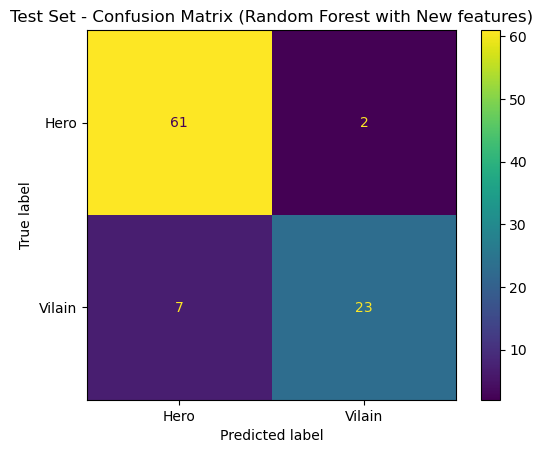

In [125]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_allfeatures, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Hero','Vilain'])
disp.plot()
plt.title('Test Set - Confusion Matrix (Random Forest with New features)')
plt.show()

### Modèle (Forêt aléatoire) avec les nouvelles fonctionnalités (Movies) et l'ensemble de données équilibré

In [126]:
# Get Features and target variable
X = heroes_combined_2.drop(['Hero_id', 'Hero_name', 'Villain', 'Centrality_Sum'], axis=1)
y = heroes_combined_2['Villain']

# Transform the dataset
X_resampled, y_resampled = pipeline.fit_resample(X, y)

# Split Data into training (80%) and test sets (20%)
X_train_movies, X_test_movies, y_train_movies, y_test_movies = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Prepare a list of hyperparameters to evaluate
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_movies, y_train_movies)

best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate model performance
y_pred_movies = best_rf.predict(X_test_movies)

# Predict probabilities for the positive class
y_probs_movies = best_rf.predict_proba(X_test_movies)[:, 1]

print(classification_report(y_test_movies, y_pred_movies, zero_division=1))

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        63
           1       0.96      0.73      0.83        30

    accuracy                           0.90        93
   macro avg       0.92      0.86      0.88        93
weighted avg       0.91      0.90      0.90        93



<Figure size 800x600 with 0 Axes>

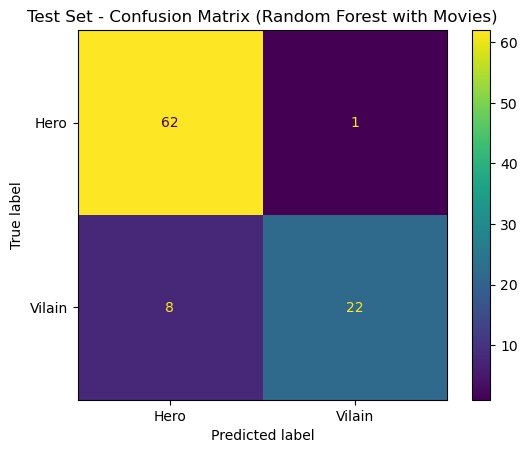

In [127]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_movies, y_pred_movies, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Hero','Vilain'])
disp.plot()
plt.title('Test Set - Confusion Matrix (Random Forest with Movies)')
plt.show()

### Modèle (Forêt aléatoire) avec les nouvelles fonctionnalités (Centralité) et l'ensemble de données équilibré

In [128]:
# Get Features and target variable
X = heroes_combined_2['Centrality_Sum']
X = X.values.reshape(-1, 1)
y = heroes_combined_2['Villain']

# Transform the dataset
X_resampled, y_resampled = pipeline.fit_resample(X, y)

X_train_centralities, X_test_centralities, y_train_centralities, y_test_centralities = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Prepare a list of hyperparameters to evaluate
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_centralities, y_train_centralities)

best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate model performance
y_pred_centralities = best_rf.predict(X_test_centralities)

# Predict probabilities for the positive class
y_probs_centralities = best_rf.predict_proba(X_test_centralities)[:, 1]

print(classification_report(y_test_centralities, y_pred_centralities, zero_division=1))

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.72      0.95      0.82        63
           1       0.70      0.23      0.35        30

    accuracy                           0.72        93
   macro avg       0.71      0.59      0.59        93
weighted avg       0.72      0.72      0.67        93



<Figure size 800x600 with 0 Axes>

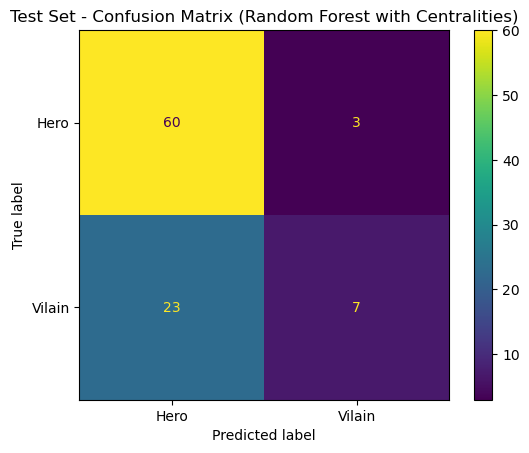

In [129]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_centralities, y_pred_centralities, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Hero','Vilain'])
disp.plot()
plt.title('Test Set - Confusion Matrix (Random Forest with Centralities)')
plt.show()

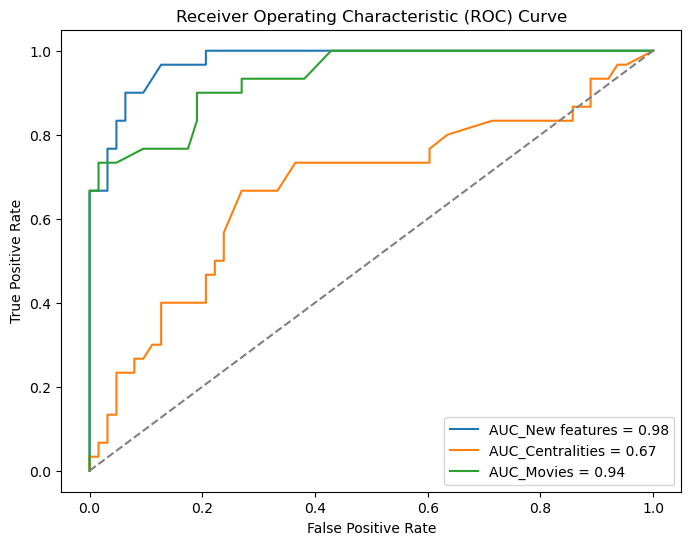

AUC Score New features: 0.9751322751322751
AUC Score Centralities: 0.6735449735449737
AUC Score Movies: 0.9357142857142857


In [130]:
# Calculate fpr, tpr, thresholds
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_test, y_probs_allfeatures)
fpr_centralities, tpr_centralities, thresholds_centralities = roc_curve(y_test_centralities, y_probs_centralities)
fpr_movies, tpr_movies, thresholds_movies = roc_curve(y_test_movies, y_probs_movies)

# Calculate AUC score
auc_score_forest = roc_auc_score(y_test, y_probs_allfeatures)
auc_score_centralities = roc_auc_score(y_test_centralities, y_probs_centralities)
auc_score_movies = roc_auc_score(y_test_movies, y_probs_movies)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_forest, tpr_forest, label=f'AUC_New features = {auc_score_forest:.2f}')
plt.plot(fpr_centralities, tpr_centralities, label=f'AUC_Centralities = {auc_score_centralities:.2f}')
plt.plot(fpr_movies, tpr_movies, label=f'AUC_Movies = {auc_score_movies:.2f}')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

print("AUC Score New features:", auc_score_forest)
print("AUC Score Centralities:", auc_score_centralities)
print("AUC Score Movies:", auc_score_movies)